In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#Загрузите данные и выведите информацию о них и проверьте на наличие пропусков
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


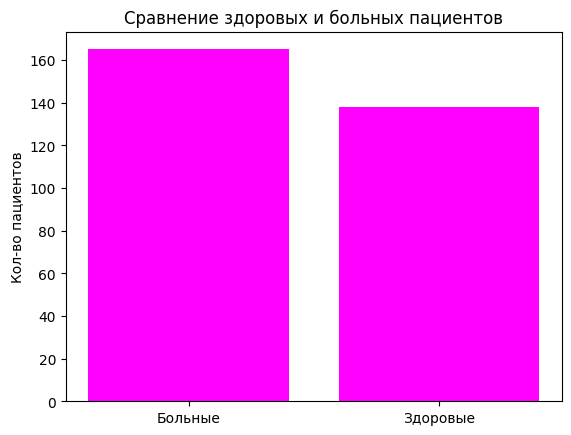

In [40]:
#Постройте столбчатую диаграмму, сравнивающую кол-во здоровых и больных пациентов
c_list = [(df["target"] == 1).sum(), (df["target"] == 0).sum()]
l_list = ["Больные", "Здоровые"]
plt.bar(l_list, c_list, color = (1, 0, 1))
plt.title("Сравнение здоровых и больных пациентов")
plt.ylabel("Кол-во пациентов")
plt.show()

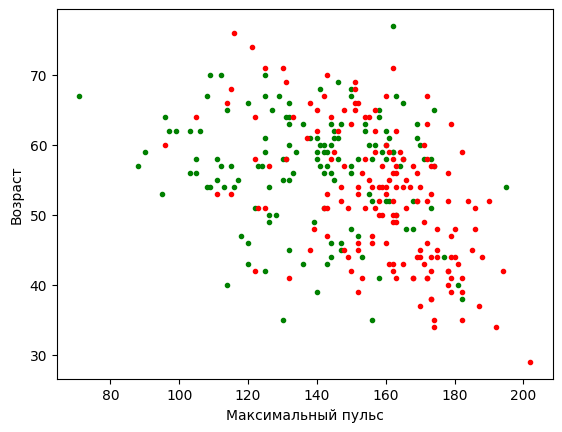

In [41]:
#Диаграмма рассеяния, показывающая зависимость thalach от age.
th_h = df['thalach'].where(df['target'] == 0)
a_h = df['age'].where(df['target'] == 0)
th_uh = df['thalach'].where(df['target'] == 1)
a_uh = df['age'].where(df['target'] == 1)
plt.scatter(th_h, a_h, color = 'green', marker = '.')
plt.scatter(th_uh, a_uh, color = 'red', marker = '.')
plt.xlabel('Максимальный пульс')
plt.ylabel('Возраст')
plt.show()

In [42]:
#Преобразование признака sex в другой формат
sex_map = {0: 'female', 1: 'male'}
df['sex'] = df['sex'].map(sex_map)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
df = pd.get_dummies(df, columns = ['sex'], dtype = 'int')
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_female,sex_male
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


In [45]:
#Средний уровень холестирина для больных и здоровых
chol_avg = df.groupby('target')['chol'].mean()
print(chol_avg)

target
0    251.086957
1    242.230303
Name: chol, dtype: float64


In [49]:
#Нормализация признаков age, trestbps, chol, thalach
features = ('age', 'trestbps', 'chol', 'thalach')
for column in features:
  df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())
print(df[['age', 'trestbps', 'chol', 'thalach']].describe())

              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean     0.528465    0.354941    0.274575    0.600358
std      0.189210    0.165454    0.118335    0.174849
min      0.000000    0.000000    0.000000    0.000000
25%      0.385417    0.245283    0.194064    0.477099
50%      0.541667    0.339623    0.260274    0.625954
75%      0.666667    0.433962    0.339041    0.725191
max      1.000000    1.000000    1.000000    1.000000
